In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [7]:
boston= pd.read_csv("/Users/macbookair/Documents/PYTHON/Projects/ML-with-Python/data/BostonHousing.csv")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42, stratify=cancer.target)

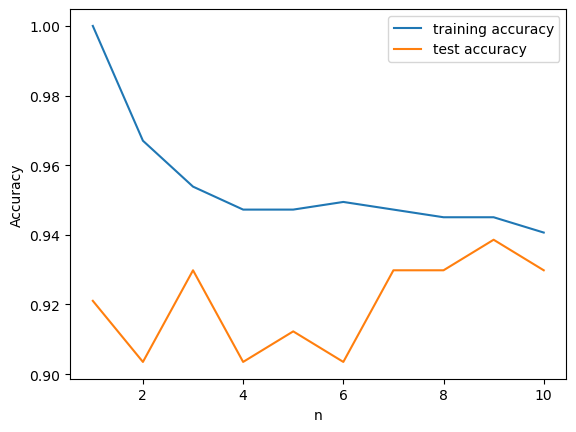

In [9]:
### Test training and test accuracy from K=1 to K=10
training_accuracy = []
test_accuracy = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test)) 

plt.plot(range(1, 11), training_accuracy, label="training accuracy")
plt.plot(range(1,11), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n")
plt.legend()    

In [10]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test= train_test_split(boston.drop("medv", axis= 1), boston["medv"], test_size= 0.2, random_state= 23)

In [12]:
lr= LinearRegression()
lr.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
lr.coef_

array([-1.02096701e-01,  4.65119270e-02,  1.49684450e-02,  3.30336317e+00,
       -1.97258917e+01,  3.64434550e+00,  4.96665387e-03, -1.51069734e+00,
        2.76148399e-01, -9.88072653e-03, -8.90677867e-01,  9.62981073e-03,
       -5.58956664e-01])

In [14]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.737773
test set score: 0.745143


In [15]:
pair_list= []
df= pd.DataFrame()
boston_features= boston.drop("medv", axis= 1)
for i in range(boston_features.shape[1]):
    for j in range(boston_features.shape[1]):
        if i != j and (f"{boston_features.columns[i]}{boston_features.columns[j]}" not in pair_list) and (f"{boston_features.columns[j]}{boston_features.columns[i]}" not in pair_list):
            temp= boston_features.iloc[:, i] * boston_features.iloc[:,j]
            temp_df= pd.DataFrame(temp, columns=   [f"{boston_features.columns[i]} * {boston_features.columns[j]}"])
            df= pd.concat([df, temp_df], axis= 1)
            pair_list.append(f"{boston_features.columns[i]}{boston_features.columns[j]}")
boston_extended= pd.concat([boston, df], axis= 1)


In [16]:
X_train, X_test, y_train, y_test= train_test_split(boston_extended.drop("medv", axis= 1), boston_extended["medv"], test_size= 0.2, random_state= 23)

In [17]:
lr= LinearRegression()
lr.fit(X_train, y_train)    
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.928897
test set score: 0.817593


In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))


training set score: 0.921456
test set score: 0.843099


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.910528
test set score: 0.820881


In [20]:
ridge0_9 = Ridge(alpha=0.9).fit(X_train, y_train)
print("training set score: %f" % ridge0_9.score(X_train, y_train))
print("test set score: %f" % ridge0_9.score(X_test, y_test))

training set score: 0.921889
test set score: 0.843302


(-20.0, 20.0)

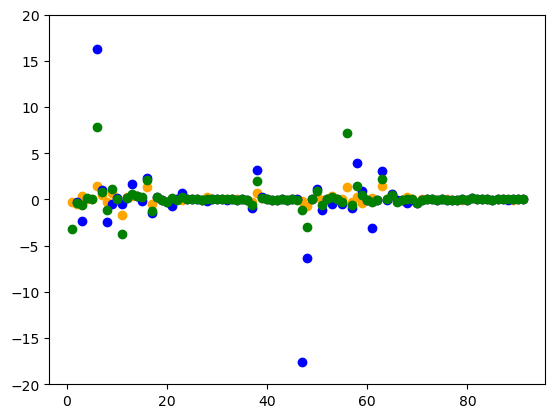

In [21]:
fig, ax= plt.subplots()
ax.scatter(range(1, len(ridge10.coef_) +1), ridge10.coef_, label= "Ridge alpha=10", c= "orange")    
ax.scatter(range(1, len(lr.coef_) +1), lr.coef_, label= "LR", c= "blue")    
ax.scatter(range(1, len(ridge0_9.coef_) +1), ridge0_9.coef_, label= "Ridge alpha=0.9", c= "green")
ax.set_ylim(-20,20)

In [22]:
from sklearn.linear_model import Lasso

In [23]:
lasso= Lasso()
lasso.fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.868817
test set score: 0.788163
number of features used: 49


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e+03, tolerance: 3.393e+00
  model = cd_fast.enet_coordinate_descent(


In [24]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.910818
test set score: 0.840730
number of features used: 84


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+03, tolerance: 3.393e+00
  model = cd_fast.enet_coordinate_descent(


In [25]:
lasso2= Lasso(alpha= 2)
lasso2.fit(X_train, y_train)
print("training set score: %f" % lasso2.score(X_train, y_train))
print("test set score: %f" % lasso2.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso2.coef_ != 0))

training set score: 0.860852
test set score: 0.790422
number of features used: 46


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e+03, tolerance: 3.393e+00
  model = cd_fast.enet_coordinate_descent(


In [26]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.913912
test set score: 0.843328
number of features used: 91


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+03, tolerance: 3.393e+00
  model = cd_fast.enet_coordinate_descent(


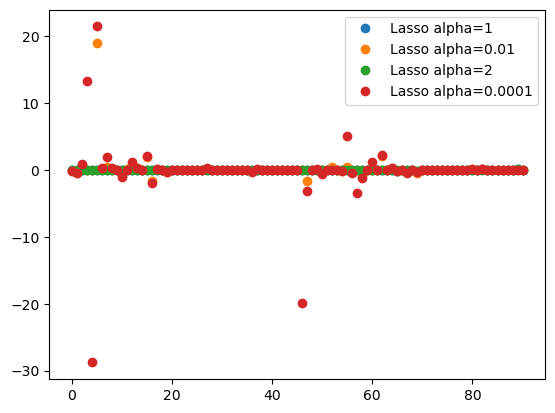

In [27]:
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso2.coef_, 'o', label="Lasso alpha=2")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")
plt.legend()

In [28]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42, stratify=cancer.target)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [30]:
logistic= LogisticRegression(max_iter= 10000)
logistic.fit(X_train, y_train)
print("training set score: %f" % logistic.score(X_train, y_train))
print("test set score: %f" % logistic.score(X_test, y_test))

training set score: 0.958242
test set score: 0.964912


In [31]:
logistic50= LogisticRegression(C=50, max_iter= 10000)
logistic50.fit(X_train, y_train)
print("training set score: %f" % logistic50.score(X_train, y_train))
print("test set score: %f" % logistic50.score(X_test, y_test))  

training set score: 0.980220
test set score: 0.973684


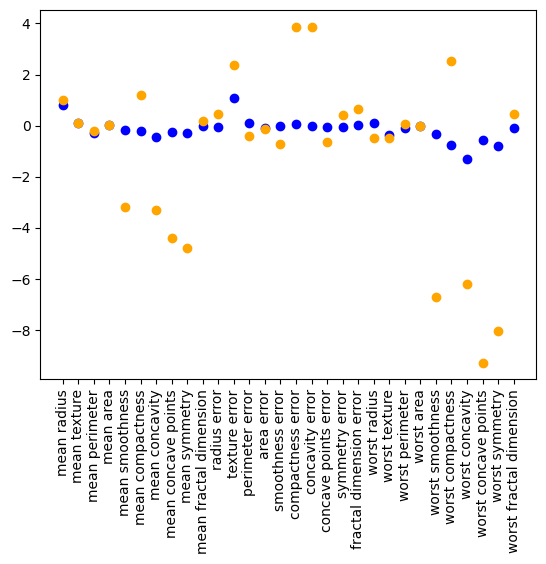

In [32]:
fig, ax= plt.subplots()
ax.scatter(range(1, X_train.shape[1] + 1 ) ,logistic.coef_, label="Logistic Regression", c= "blue")
ax.scatter(range(1, X_train.shape[1] + 1 ) ,logistic50.coef_, label="Logistic Regression, C=50", c= "orange")
ax.set_xticks(range(1, X_train.shape[1] + 1 ), labels = cancer.feature_names, rotation= 90) 




In [33]:
svc= LinearSVC(C= 1)
svc.fit(X_train, y_train)
print("training set score: %f" % svc.score(X_train, y_train))
print("test set score: %f" % svc.score(X_test, y_test))     


training set score: 0.960440
test set score: 0.973684


In [35]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42, stratify=cancer.target)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state= 23)
dt.fit(X_train, y_train)
print("training set score: %f" % dt.score(X_train, y_train))
print("test set score: %f" % dt.score(X_test, y_test))


training set score: 1.000000
test set score: 0.903509


In [37]:
dt2= DecisionTreeClassifier(max_depth=4, random_state= 23)
dt2.fit(X_train, y_train)
print("training set score: %f" % dt2.score(X_train, y_train))
print("test set score: %f" % dt2.score(X_test, y_test))

training set score: 0.986813
test set score: 0.938596


In [38]:
dt4= DecisionTreeClassifier(max_depth=4, random_state= 23)
dt4.fit(X_train, y_train)           
print("training set score: %f" % dt4.score(X_train, y_train))
print("test set score: %f" % dt4.score(X_test, y_test))

training set score: 0.986813
test set score: 0.938596


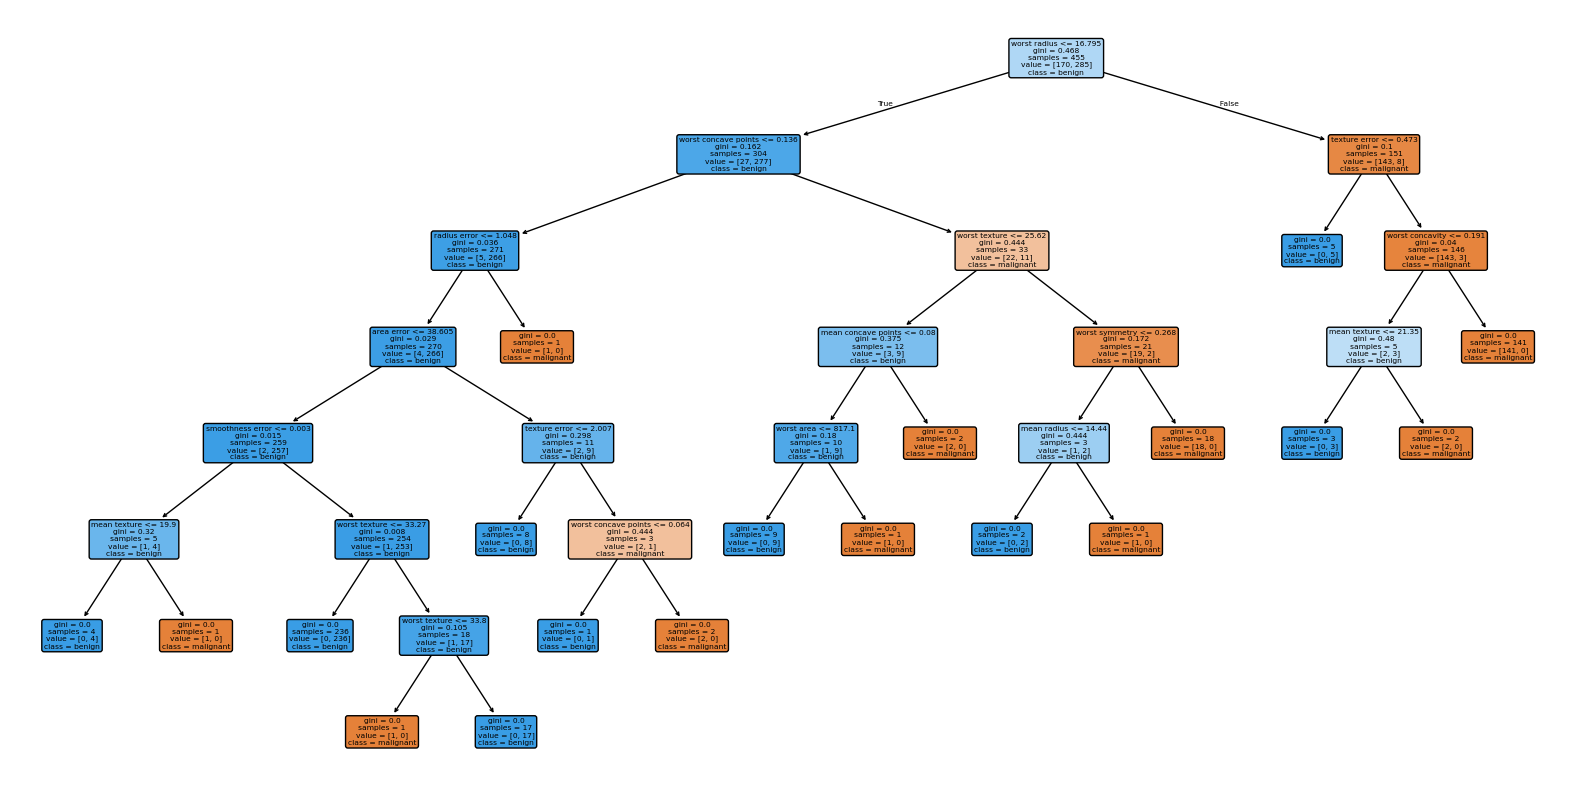

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  # Set a large figure size so text fits
plot_tree(dt, 
          filled=True,                   # Colors the nodes by class
          feature_names=cancer.feature_names, 
          class_names=cancer.target_names,
          rounded=True)                  # Rounds the box corners

plt.show()

In [40]:
dt.feature_importances_

array([0.00626075, 0.01878225, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01267802, 0.        , 0.        ,
       0.0090813 , 0.05266073, 0.        , 0.00300348, 0.00177016,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69781114, 0.04009891, 0.        , 0.00845201, 0.        ,
       0.        , 0.01632512, 0.12234342, 0.01073271, 0.        ])

([<matplotlib.axis.XTick at 0x1809bc190>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'wor

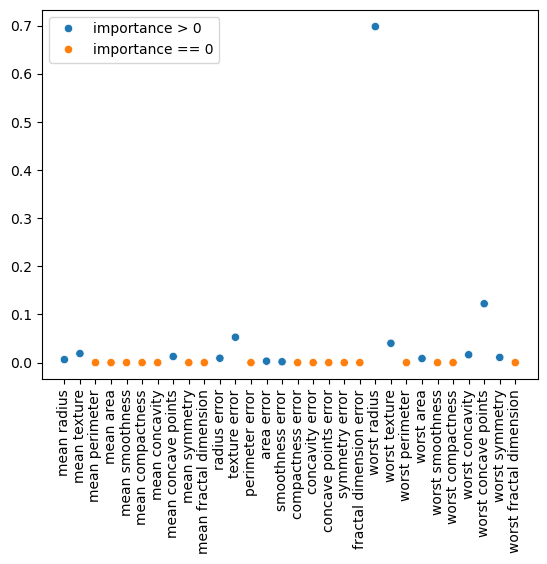

In [80]:
colors= ['importance == 0' if importance == 0 else 'importance > 0' for importance in dt.feature_importances_]
sns.scatterplot(x= range(0, len(cancer.feature_names)), y= dt.feature_importances_, hue= colors)

plt.xticks(range(0, len(cancer.feature_names)), labels=cancer.feature_names, rotation=90)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 100, random_state= 23, max_depth= 4, bootstrap= True, max_features= 'sqrt')

In [78]:
rf.fit(X_train, y_train)
print("training set score: %f" % rf.score(X_train, y_train))
print("test set score: %f" % rf.score(X_test, y_test))

training set score: 0.991209
test set score: 0.956140


([<matplotlib.axis.XTick at 0x180a56e90>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'wor

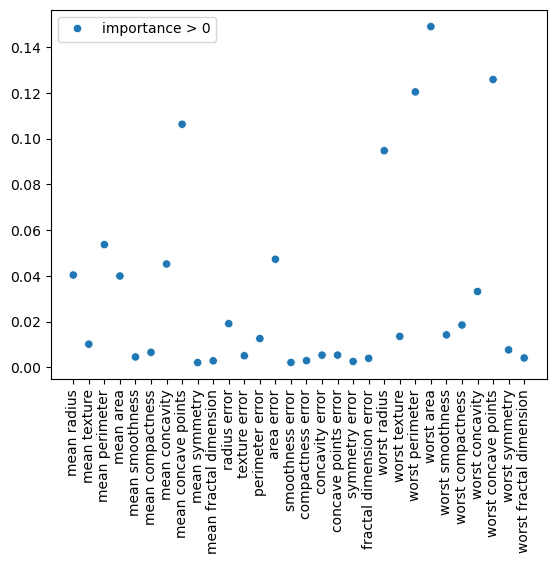

In [81]:
colors= ['importance == 0' if importance == 0 else 'importance > 0' for importance in rf.feature_importances_]
sns.scatterplot(x= range(0, len(cancer.feature_names)), y= rf.feature_importances_, hue= colors)

plt.xticks(range(0, len(cancer.feature_names)), labels=cancer.feature_names, rotation=90)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbc= GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1, max_depth= 3, random_state= 23)  
gbc.fit(X_train, y_train)
print("training set score: %f" % gbc.score(X_train, y_train))
print("test set score: %f" % gbc.score(X_test, y_test))

training set score: 1.000000
test set score: 0.956140


In [97]:
gbc2= GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.2, max_depth= 1, random_state= 23)  
gbc2.fit(X_train, y_train)
print("training set score: %f" % gbc2.score(X_train, y_train))
print("test set score: %f" % gbc2.score(X_test, y_test))

training set score: 0.995604
test set score: 0.964912


In [131]:
gbc2.predict_proba(X_test)

array([[9.98944697e-01, 1.05530300e-03],
       [2.93655371e-04, 9.99706345e-01],
       [9.93530678e-01, 6.46932151e-03],
       [6.52607090e-01, 3.47392910e-01],
       [9.98551394e-01, 1.44860564e-03],
       [1.15560830e-02, 9.88443917e-01],
       [1.49883512e-04, 9.99850116e-01],
       [9.99147020e-01, 8.52980064e-04],
       [9.94628328e-01, 5.37167244e-03],
       [9.99682531e-01, 3.17468697e-04],
       [4.33910882e-03, 9.95660891e-01],
       [9.94045970e-01, 5.95403005e-03],
       [1.04718354e-03, 9.98952816e-01],
       [9.97865277e-01, 2.13472281e-03],
       [9.98811479e-01, 1.18852150e-03],
       [2.13594919e-01, 7.86405081e-01],
       [3.95696463e-01, 6.04303537e-01],
       [1.42173976e-01, 8.57826024e-01],
       [5.24639170e-04, 9.99475361e-01],
       [1.90125369e-02, 9.80987463e-01],
       [9.94398143e-01, 5.60185734e-03],
       [8.78308754e-01, 1.21691246e-01],
       [8.07722880e-03, 9.91922771e-01],
       [6.74527816e-03, 9.93254722e-01],
       [2.640982

In [99]:
gbc2.feature_importances_

array([0.00000000e+00, 5.33626439e-03, 0.00000000e+00, 0.00000000e+00,
       1.23223884e-03, 0.00000000e+00, 0.00000000e+00, 1.48202027e-01,
       0.00000000e+00, 0.00000000e+00, 3.31332722e-04, 0.00000000e+00,
       0.00000000e+00, 1.51093666e-02, 3.92484317e-03, 4.18133860e-04,
       4.98498832e-04, 0.00000000e+00, 7.32345363e-04, 2.21634751e-04,
       2.69260980e-01, 2.60660221e-02, 1.96152159e-01, 3.37781158e-02,
       4.32500173e-03, 1.11581418e-03, 2.00845225e-03, 2.81560545e-01,
       8.15038287e-03, 1.57584024e-03])

([<matplotlib.axis.XTick at 0x180b9d310>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'wor

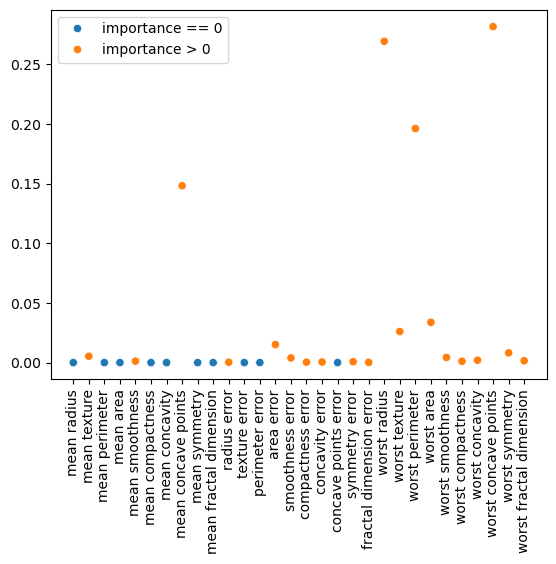

In [98]:
colors= ['importance == 0' if importance == 0 else 'importance > 0' for importance in gbc2.feature_importances_]
sns.scatterplot(x= range(0, len(cancer.feature_names)), y= gbc2.feature_importances_, hue= colors)

plt.xticks(range(0, len(cancer.feature_names)), labels=cancer.feature_names, rotation=90)

In [100]:
from sklearn.neural_network import MLPClassifier

In [119]:
mlpc= MLPClassifier(max_iter= 1000, hidden_layer_sizes= [10], activation= "tanh")
mlpc.fit(X_train, y_train)
print("training set score: %f" % mlpc.score(X_train, y_train))
print("test set score: %f" % mlpc.score(X_test, y_test))

training set score: 0.901099
test set score: 0.885965


In [120]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test) 

In [126]:
mlpc_scaled= MLPClassifier(max_iter= 1000, hidden_layer_sizes= [10], activation= "relu")
mlpc_scaled.fit(X_train_scaled, y_train)
print("training set score: %f" % mlpc_scaled.score(X_train_scaled, y_train))
print("test set score: %f" % mlpc_scaled.score(X_test_scaled, y_test))

training set score: 0.991209
test set score: 0.956140


In [130]:
mlpc_scaled= MLPClassifier(max_iter= 1000, alpha= 2)
mlpc_scaled.fit(X_train_scaled, y_train)
print("training set score: %f" % mlpc_scaled.score(X_train_scaled, y_train))
print("test set score: %f" % mlpc_scaled.score(X_test_scaled, y_test))

training set score: 0.989011
test set score: 0.982456


In [133]:
from sklearn.datasets import load_diabetes
diabetes= load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [134]:
diabetes.data.shape

(442, 10)

In [141]:
diabetes["target"]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [197]:
X_train, X_test, y_train, y_test= train_test_split(diabetes.data, diabetes.target, test_size= 0.2, random_state= 23)

In [139]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)   


<Axes: >

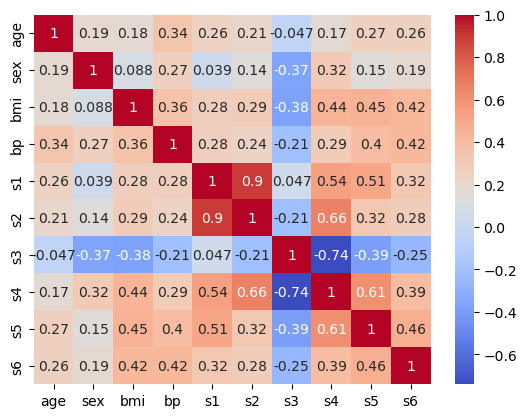

In [150]:
sns.heatmap(pd.DataFrame(X_train_scaled, columns= diabetes["feature_names"]).corr(), cmap="coolwarm", annot= True)

In [153]:
full_train = pd.concat([pd.DataFrame(X_train, columns= diabetes["feature_names"]), pd.DataFrame(y_train, columns= ["target"])], axis= 1)

In [154]:
full_train.corr()["target"].sort_values()

s3       -0.400994
sex       0.023403
age       0.172899
s2        0.202048
s1        0.229975
s6        0.398667
bp        0.423827
s4        0.451647
s5        0.574980
bmi       0.577792
target    1.000000
Name: target, dtype: float64

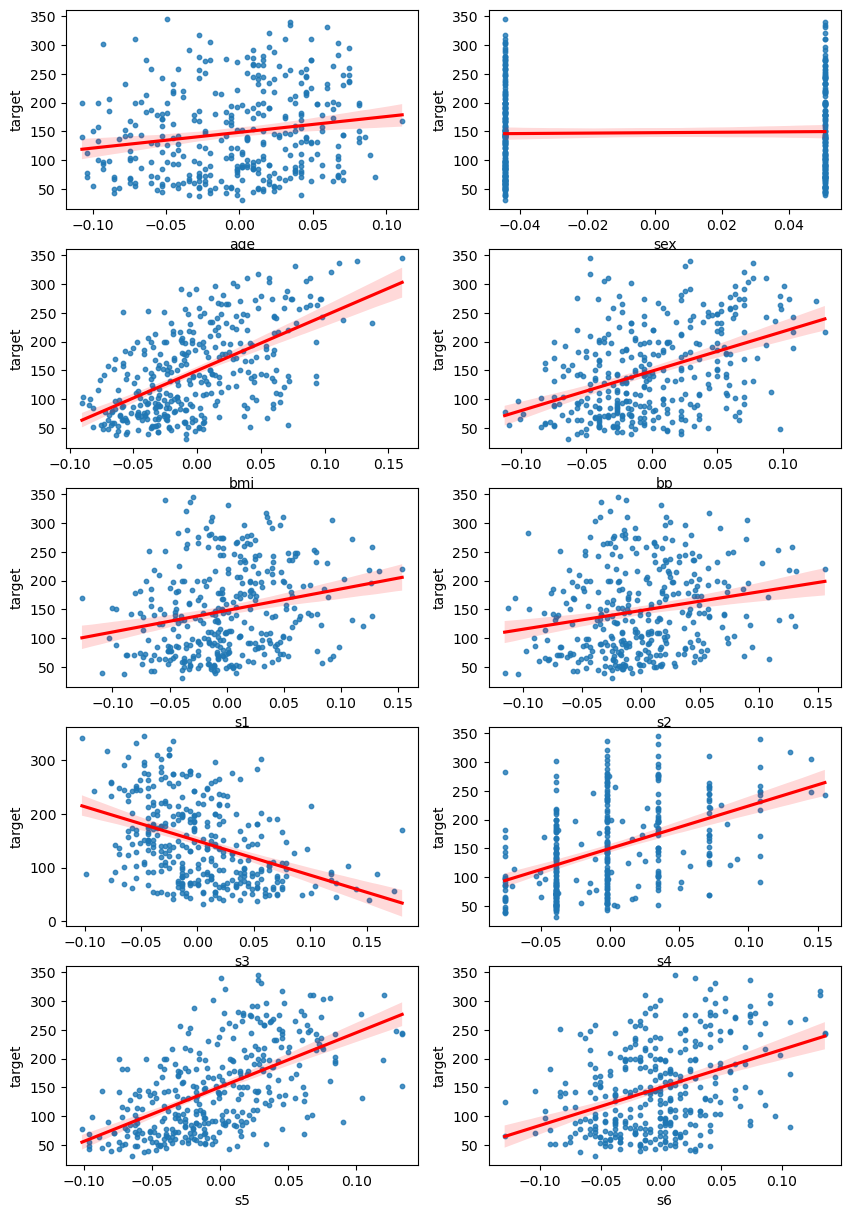

In [ ]:
fig, ax= plt.subplots(5, 2, figsize= (10,15))
for col, ax in zip(diabetes["feature_names"], ax.flatten()):
    sns.regplot(x= full_train[col], y= full_train["target"], ax= ax, scatter_kws={"s":10}, line_kws={"color":"red"})
    ax.set_xlabel(col)
    ax.set_ylabel("target") 
    